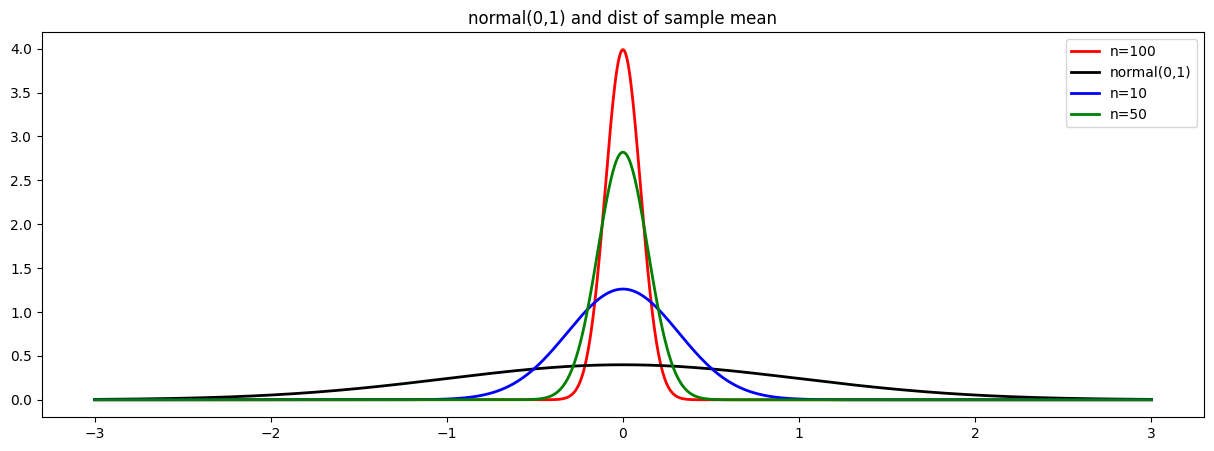

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Example 1: Normal distribution sample mean
u = np.linspace(-3, 3, 1000)
n1, n2, n3 = 10, 50, 100
plt.figure(figsize=(15, 5))
plt.plot(u, stats.norm.pdf(u, scale=1/np.sqrt(n3)), label='n=100', color='red', linewidth=2)
plt.plot(u, stats.norm.pdf(u), label='normal(0,1)', color='black', linewidth=2)
plt.plot(u, stats.norm.pdf(u, scale=1/np.sqrt(n1)), label='n=10', color='blue', linewidth=2)
plt.plot(u, stats.norm.pdf(u, scale=1/np.sqrt(n2)), label='n=50', color='green', linewidth=2)
plt.legend()
plt.title('normal(0,1) and dist of sample mean')
plt.show()

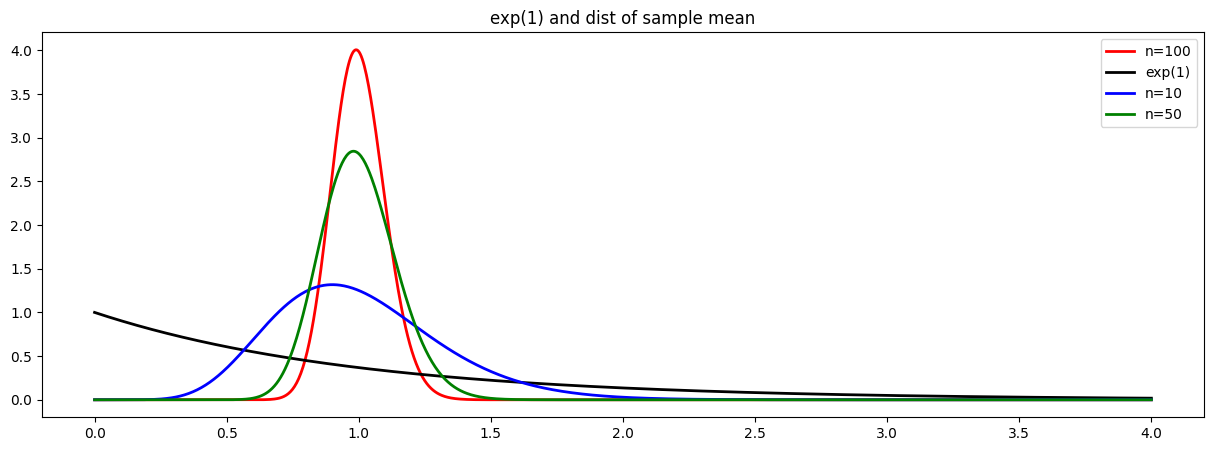

In [2]:
# Example 2: Exponential distribution sample mean
u = np.linspace(0, 4, 1000)
plt.figure(figsize=(15, 5))
plt.plot(u, stats.gamma.pdf(u, n3, scale=1/n3), label='n=100', color='red', linewidth=2)
plt.plot(u, stats.expon.pdf(u), label='exp(1)', color='black', linewidth=2)
plt.plot(u, stats.gamma.pdf(u, n1, scale=1/n1), label='n=10', color='blue', linewidth=2)
plt.plot(u, stats.gamma.pdf(u, n2, scale=1/n2), label='n=50', color='green', linewidth=2)
plt.legend()
plt.title('exp(1) and dist of sample mean')
plt.show()

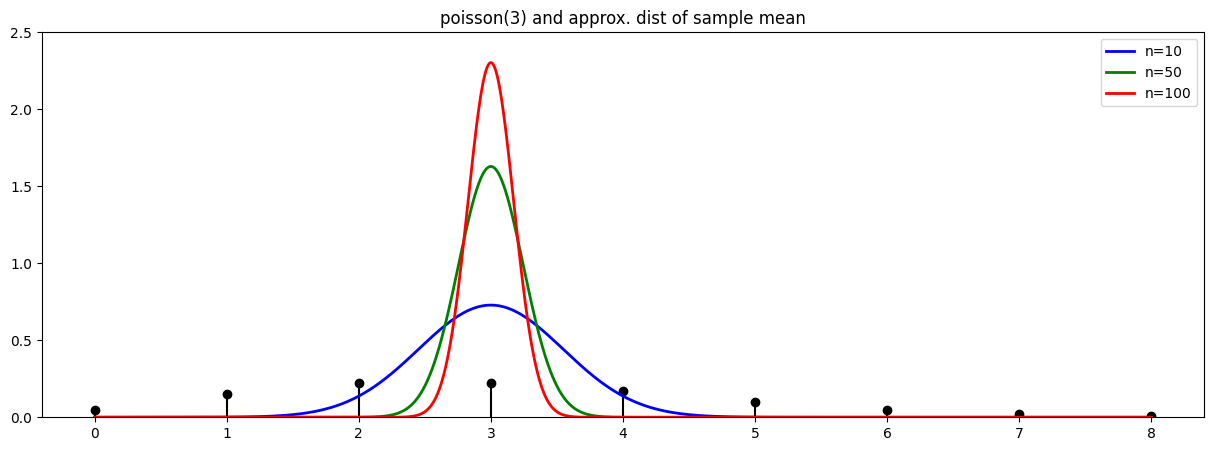

In [3]:
# Example 3: Poisson distribution approximation
u = np.linspace(0, 8, 1000)
plt.figure(figsize=(15, 5))
plt.stem(range(9), stats.poisson.pmf(range(9), 3), linefmt='black', markerfmt='o', basefmt=" ")
plt.plot(u, stats.norm.pdf(u, loc=3, scale=np.sqrt(3/n1)), label='n=10', color='blue', linewidth=2)
plt.plot(u, stats.norm.pdf(u, loc=3, scale=np.sqrt(3/n2)), label='n=50', color='green', linewidth=2)
plt.plot(u, stats.norm.pdf(u, loc=3, scale=np.sqrt(3/n3)), label='n=100', color='red', linewidth=2)
plt.legend()
plt.title('poisson(3) and approx. dist of sample mean')
plt.ylim(0, 2.5)
plt.show()

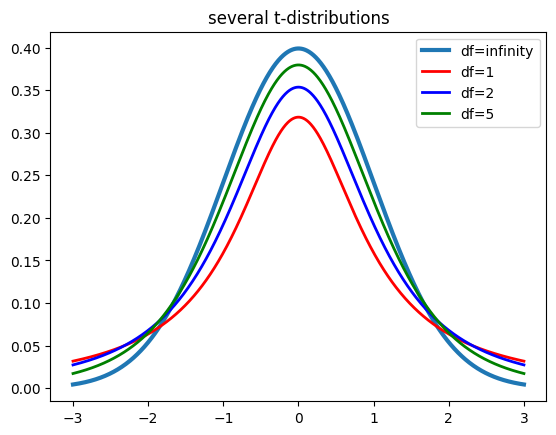

In [4]:
# Example 4: t-distribution
u = np.linspace(-3, 3, 1000)
plt.plot(u, stats.norm.pdf(u), label='df=infinity', linewidth=3)
plt.plot(u, stats.t.pdf(u, df=1), label='df=1', color='red', linewidth=2)
plt.plot(u, stats.t.pdf(u, df=2), label='df=2', color='blue', linewidth=2)
plt.plot(u, stats.t.pdf(u, df=5), label='df=5', color='green', linewidth=2)
plt.legend()
plt.title('several t-distributions')
plt.show()

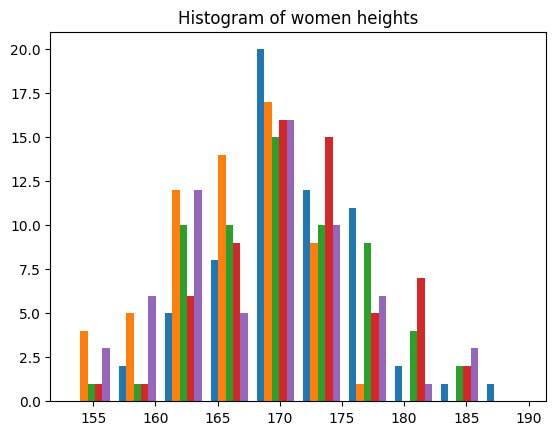

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 62 and the array at index 1 has size 5

<Figure size 640x480 with 0 Axes>

In [5]:
# Example 5: Heights of women
data_women = np.loadtxt('lengthswomen.txt')
plt.hist(data_women)
plt.title('Histogram of women heights')
plt.show()

plt.figure()
stats.probplot(data_women, dist="norm", plot=plt)
plt.title('Q-Q plot of women heights')
plt.show()

n = len(data_women)
m = np.mean(data_women)
s = np.std(data_women, ddof=1)
t = stats.t.ppf(0.975, df=n-1)
ci = (m - t * s / np.sqrt(n), m + t * s / np.sqrt(n))
print('Confidence interval:', ci)

In [ ]:
# Example 6: Amsterdam incomes
data_amsterdam = np.loadtxt('amsterdam.txt')
m = np.mean(data_amsterdam)
s = np.std(data_amsterdam, ddof=1)
n = len(data_amsterdam)
t_stat = (m - 34500) / (s / np.sqrt(n))
p_value = 1 - stats.t.cdf(t_stat, df=n-1)
print('p-value:', p_value)
statsmodels.stats.weightstats.ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)[source]


In [ ]:
# Plot p-value region
u = np.linspace(-3, 3, 1000)
plt.plot(u, stats.t.pdf(u, df=n-1), linewidth=2)
v = np.linspace(t_stat, 3, 1000)
plt.fill_between(v, stats.t.pdf(v, df=n-1), color='blue')
plt.title('p-value for Amsterdam')
plt.xlabel('t')
plt.show()

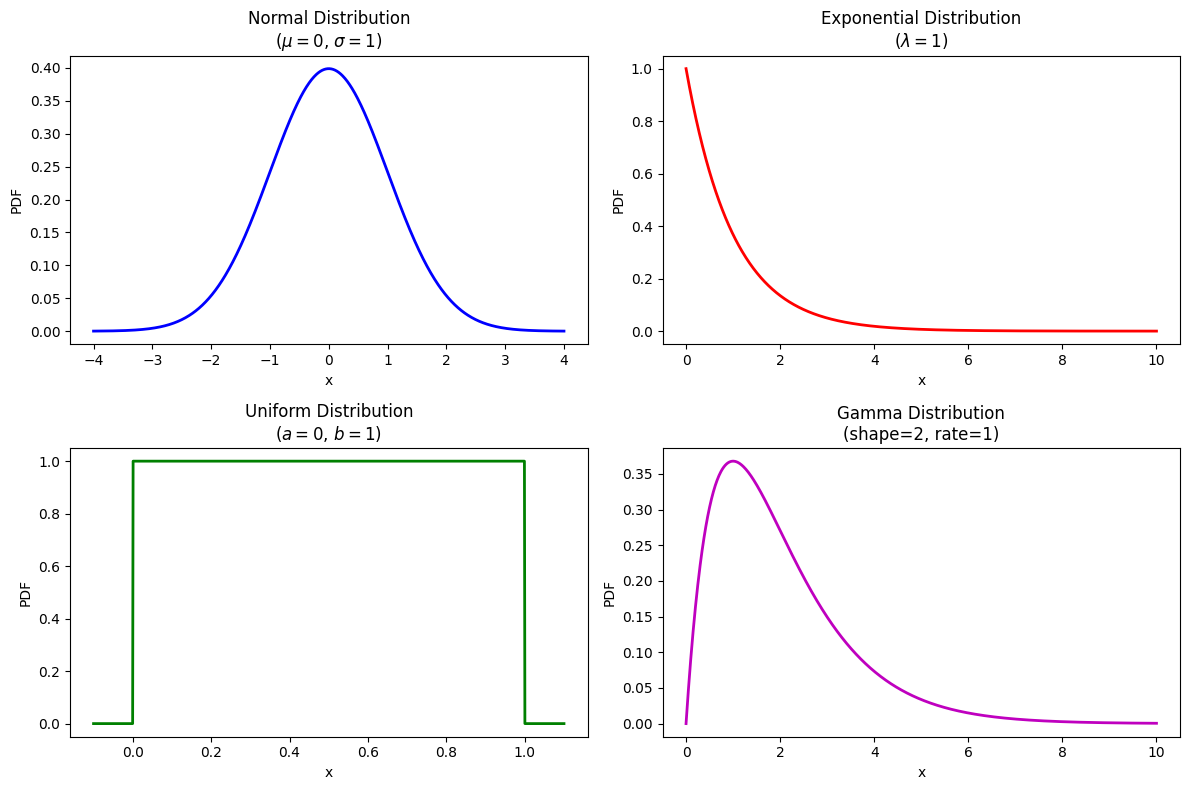

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Normal distribution (norm) with mean = 0 and sd = 1
mu, sigma = 0, 1
x_norm = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf_norm = stats.norm.pdf(x_norm, loc=mu, scale=sigma)

# 2. Exponential distribution (exp) with lambda = 1
# In SciPy, scale = 1/lambda.
x_exp = np.linspace(0, 10, 1000)
pdf_exp = stats.expon.pdf(x_exp, scale=1)  # lambda = 1 so scale = 1

# 3. Uniform distribution (unif) with min = a and max = b
# For demonstration, we set a = 0 and b = 1.
a, b = 0, 1
x_unif = np.linspace(a - 0.1, b + 0.1, 1000)
pdf_unif = stats.uniform.pdf(x_unif, loc=a, scale=b - a)

# 4. Gamma distribution (gamma) with shape parameter and rate = 1.
# The gamma PDF in SciPy is defined with a shape parameter 'a' and a scale = 1/rate.
shape = 2  # choose a shape value (can be adjusted)
x_gamma = np.linspace(0, 10, 1000)
pdf_gamma = stats.gamma.pdf(x_gamma, a=shape, scale=1)  # rate = 1 so scale = 1

# Create subplots for each distribution.
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Normal distribution
axs[0, 0].plot(x_norm, pdf_norm, 'b-', lw=2)
axs[0, 0].set_title('Normal Distribution\n($\\mu=0$, $\\sigma=1$)')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('PDF')

# Plot Exponential distribution
axs[0, 1].plot(x_exp, pdf_exp, 'r-', lw=2)
axs[0, 1].set_title('Exponential Distribution\n($\\lambda=1$)')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('PDF')

# Plot Uniform distribution
axs[1, 0].plot(x_unif, pdf_unif, 'g-', lw=2)
axs[1, 0].set_title('Uniform Distribution\n($a=0$, $b=1$)')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('PDF')

# Plot Gamma distribution
axs[1, 1].plot(x_gamma, pdf_gamma, 'm-', lw=2)
axs[1, 1].set_title('Gamma Distribution\n(shape=2, rate=1)')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('PDF')

plt.tight_layout()
plt.show()

In [7]:
from scipy.stats import norm
mu, sigma = 0, 1
x = 0.5
a = 0.95
size = 10

# Equivalent of ddist
density = norm.pdf(x, loc=mu, scale=sigma)

# Equivalent of pdist
cdf_value = norm.cdf(x, loc=mu, scale=sigma)

# Equivalent of qdist
quantile_value = norm.ppf(a, loc=mu, scale=sigma)

# Equivalent of rdist
random_samples = norm.rvs(loc=mu, scale=sigma, size=size)

print(f"Density at x={x}: {density}")
print(f"CDF at x={x}: {cdf_value}")
print(f"{a}-Quantile: {quantile_value}")
print(f"Random Samples: {random_samples}")


Density at x=0.5: 0.3520653267642995
CDF at x=0.5: 0.6914624612740131
0.95-Quantile: 1.6448536269514722
Random Samples: [-0.08484484 -1.71475511 -1.60020366  0.33140413 -0.41261195 -1.4079874
 -1.27306008  1.08621295 -1.0469666  -0.26412379]


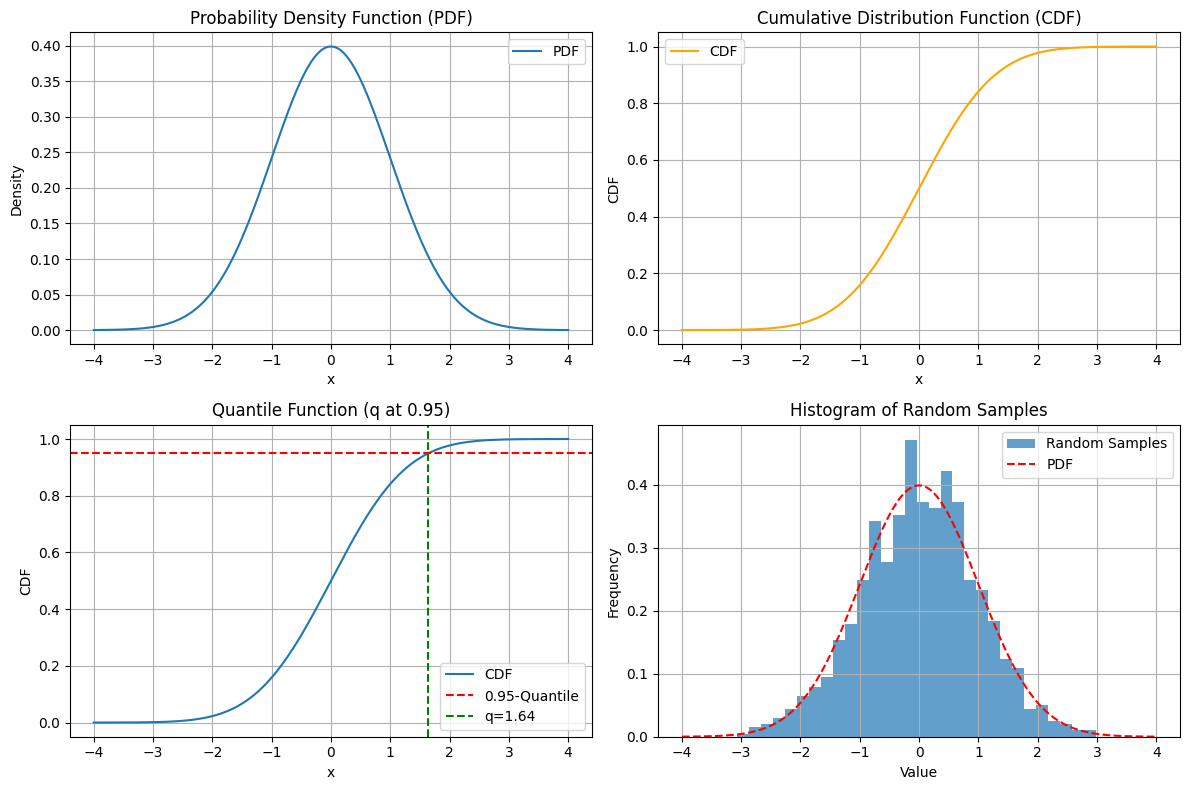

In [8]:
# Parameters
mu, sigma = 0, 1
x = np.linspace(-4, 4, 1000)
size = 1000
a = 0.95

# Functions
density = norm.pdf(x, loc=mu, scale=sigma)
cdf_value = norm.cdf(x, loc=mu, scale=sigma)
quantile_value = norm.ppf(a, loc=mu, scale=sigma)
random_samples = norm.rvs(loc=mu, scale=sigma, size=size)

# Plot PDF
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(x, density, label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(2, 2, 2)
plt.plot(x, cdf_value, label='CDF', color='orange')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('CDF')
plt.grid(True)
plt.legend()

# Plot Quantile
plt.subplot(2, 2, 3)
plt.plot(x, cdf_value, label='CDF')
plt.axhline(y=a, color='red', linestyle='--', label=f'{a}-Quantile')
plt.axvline(x=quantile_value, color='green', linestyle='--', label=f'q={quantile_value:.2f}')
plt.title(f'Quantile Function (q at {a})')
plt.xlabel('x')
plt.ylabel('CDF')
plt.grid(True)
plt.legend()

# Histogram of Random Samples
plt.subplot(2, 2, 4)
plt.hist(random_samples, bins=30, density=True, alpha=0.7, label='Random Samples')
plt.plot(x, density, 'r--', label='PDF')
plt.title('Histogram of Random Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
from scipy.stats import norm, binom, poisson

# Normal distribution probabilities: P(-1 < X <= 2)
prob_normal = norm.cdf(2, loc=0, scale=1) - norm.cdf(-1, loc=0, scale=1)
print(f"P(-1<X<=2) = {prob_normal:.6f}")

P(-1<X<=2) = 0.818595


In [10]:
# Generating 4 standard normal random samples
samples_normal = norm.rvs(size=4, loc=0, scale=1)
print("4 standard normal samples:", samples_normal)

4 standard normal samples: [-0.06053281 -0.56484152  1.09022674  2.15811707]


In [11]:
# Binomial distribution probability: P(X = 1) with size=5 and prob=0.2
prob_binom_1 = binom.pmf(1, n=5, p=0.2)
print(f"P(X=1) Binomial(n=5,p=0.2): {prob_binom_1:.4f}")

P(X=1) Binomial(n=5,p=0.2): 0.4096


In [12]:
# Binomial distribution cumulative probability: P(X <= 1)
prob_binom_cdf_1 = binom.cdf(1, n=5, p=0.2)
print(f"P(X<=1) Binomial(n=5,p=0.2): {prob_binom_cdf_1:.5f}")

P(X<=1) Binomial(n=5,p=0.2): 0.73728


In [13]:
# Checking the cumulative binomial probability explicitly (P(X=0) + P(X=1))
prob_binom_explicit = binom.pmf(0, 5, 0.2) + binom.pmf(1, 5, 0.2)
print(f"P(X=0)+P(X=1) explicitly: {prob_binom_explicit:.5f}")

P(X=0)+P(X=1) explicitly: 0.73728


In [14]:
# Generate 3 Poisson random samples with lambda=5
samples_poisson = poisson.rvs(mu=5, size=3)
print("3 Poisson samples (lambda=5):", samples_poisson)

3 Poisson samples (lambda=5): [5 1 5]


# normal CDF

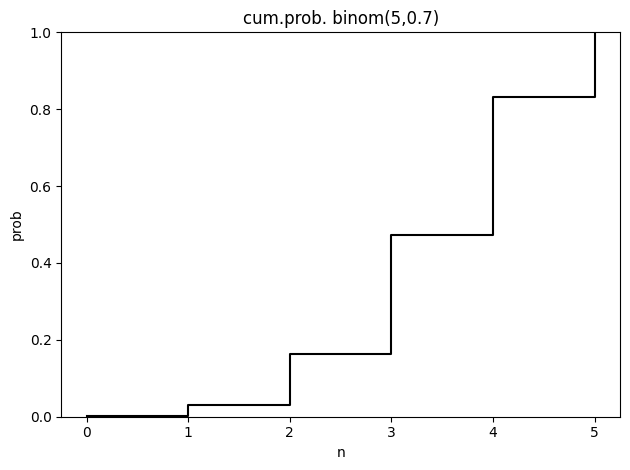

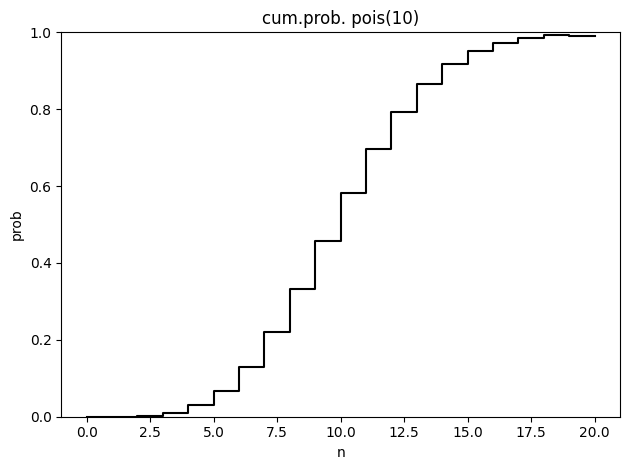

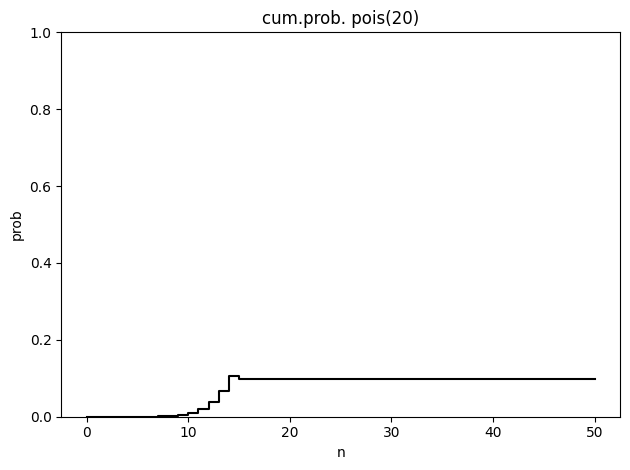

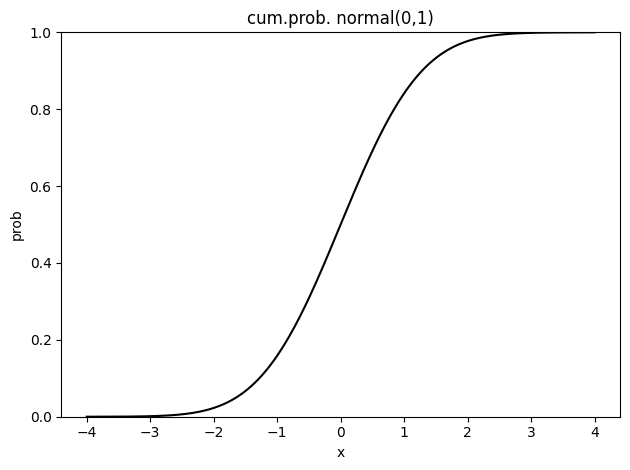

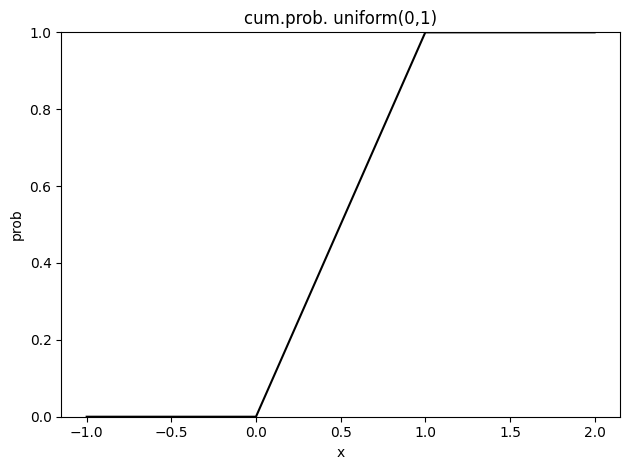

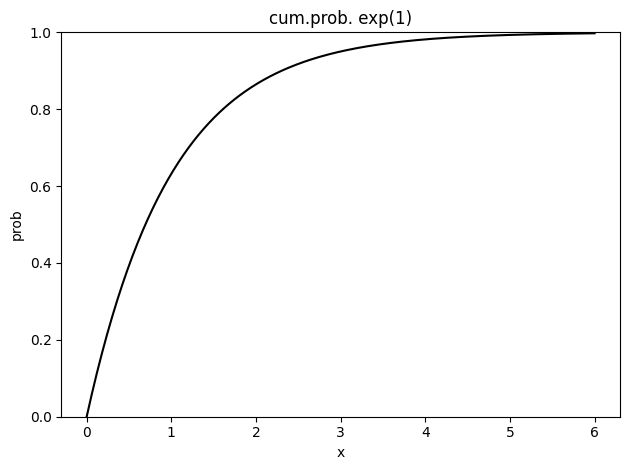

In [16]:
from scipy.special import erf   # only for the normal CDF
import math   

def binom_cdf(n, p):
    xs  = np.arange(0, n + 1)
    pmf = [math.comb(n, k) * p**k * (1 - p)**(n - k) for k in xs]
    return xs, np.cumsum(pmf)

def pois_cdf(lmbda, max_x):
    xs  = np.arange(0, max_x + 1)
    pmf = [math.exp(-lmbda) * lmbda**k / math.factorial(k) for k in xs]
    return xs, np.cumsum(pmf)

def normal_cdf_grid(mu=0, sigma=1, n=400):
    xs  = np.linspace(mu - 4*sigma, mu + 4*sigma, n)
    cdf = 0.5 * (1 + erf((xs - mu) / (sigma * math.sqrt(2))))
    return xs, cdf
# --- 1  Binomial(5, 0.7) ---
xs, cdf = binom_cdf(5, 0.7)
plt.figure()
plt.step(xs, cdf, where="post", color="black")
plt.ylim(0, 1); plt.xlabel('n'); plt.ylabel('prob')
plt.title('cum.prob. binom(5,0.7)')
plt.tight_layout()
# --- 2  Poisson(10) ---
xs, cdf = pois_cdf(10, max_x=20)
plt.figure()
plt.step(xs, cdf, where="post", color="black")
plt.ylim(0, 1); plt.xlabel('n'); plt.ylabel('prob')
plt.title('cum.prob. pois(10)')
plt.tight_layout()
# --- 3  Poisson(20) ---
xs, cdf = pois_cdf(20, max_x=50)
plt.figure()
plt.step(xs, cdf, where="post", color="black")
plt.ylim(0, 1); plt.xlabel('n'); plt.ylabel('prob')
plt.title('cum.prob. pois(20)')
plt.tight_layout()
# --- 4  Normal(0,1) ---
xs, cdf = normal_cdf_grid()
plt.figure()
plt.plot(xs, cdf, color="black")
plt.ylim(0, 1); plt.xlabel('x'); plt.ylabel('prob')
plt.title('cum.prob. normal(0,1)')
plt.tight_layout()
# --- 5  Uniform(0,1) ---
xs = np.linspace(-1, 2, 400)
cdf = np.where(xs < 0, 0, np.where(xs > 1, 1, xs))
plt.figure()
plt.plot(xs, cdf, color="black")
plt.ylim(0, 1); plt.xlabel('x'); plt.ylabel('prob')
plt.title('cum.prob. uniform(0,1)')
plt.tight_layout()
# --- 6  Exponential(1) ---
xs = np.linspace(0, 6, 400)
cdf = 1 - np.exp(-xs)
plt.figure()
plt.plot(xs, cdf, color="black")
plt.ylim(0, 1); plt.xlabel('x'); plt.ylabel('prob')
plt.title('cum.prob. exp(1)')
plt.tight_layout()
plt.show()     